# Exercise 2 - CNNs, ResNets and LR-Scheduling

 * Deep Learning for Computer Vision – Winter Term 2023/24
 * Organizers: Anwai Archit, Sushmita Nair, Constantin Pape
 * Tutors: Ahsan Ali, Anwai Archit, Lukas Friedrich, Piklu Mallick, Sushmita Nair, Ayush Paliwal, Paul Wollenhaupt
 * Due date: **Tuesday, Nov 21, before 10:00**

### Time required to solve this exercise sheet
**As you will train a large number of models on this exercise sheet, model training will require an increased amount of time. So we recommend to start working on this sheet early.**

### Topics

In this exercise sheet, you will:
- work again with CIFAR-10
- implement a 1-layer CNN
- compare MLP and CNN
- vary architecture to improve model performance
- implement a ResNet for CIFAR-10
- learn about learning rate scheduling

*We are looking forward to seeing your solutions! Have fun!*

# IMPORTANT SUBMISSION INSTRUCTIONS

You should work on the exercises in groups of 3-4. It is on you how you collaborate, but please make sure that everyone contributes equally and also that you understand all the solutions.
You will be asked to present your group's solution in the tutorials and you should be well prepared to present any part of it.

- When you've completed the exercise, download the notebook and rename it to ```<surname1>_<surname2>_<surname3>.ipynb```.
- Only submit the Jupyter Notebook (ipynb file). No other file is required. Upload it on `Stud.IP` -> `Deep Learning for Computer Vision` -> `Files` -> `Submission of Homework 2`.
- Make only one submission of the exercise per group.
- The deadline is strict.
- In addition to the submissions, every member of your group should be prepared to present the exercise in the tutorials.

Implementation
- Do not change the cells which are marked as `DO NOT CHANGE`, similarly write your solution to the marked cells.

### Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, ExponentialLR, StepLR
import torchvision
from torchvision import datasets, transforms, models
import fastprogress
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import time

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Setup

You can use the functions to grab the data, split the sets, create the dataloaders and plot results, etc. given to you at exercise sheet 1.

It is good practice to store functions that are constantly needed again in a separate file such that instead of copy-pasting the cells into each exercise notebook, you can use the python file containing the functions and import it in the notebooks.

If you work with Kaggle (recommended) you have to mount the drive first and create a path to your python module or download the file from your drive.

#### **TODO**
Create a file named `setup.py` with all the necessary functions. Download this file to your Kaggle workspace and import it on this notebook.

Hint: Use the package `gdown` to download files from google drive.

```python
!conda install -y gdown
!gdown <file_id>
```

Here's how to find the `file_id`: 
If the file URL is https://drive.google.com/file/d/1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk/view?usp=share_link

where, `file_id` is 2732jDmxp7fXwddNGj8h0CWJA0WWLpvKk

In [2]:
# TODO Download setup.py from google drive in Kaggle
!conda install -y gdown

Retrieving notices: ...working... done
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [3]:
!gdown https://drive.google.com/uc?id=1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk

Downloading...
From (uriginal): https://drive.google.com/uc?id=1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk
From (redirected): https://drive.google.com/uc?id=1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk&confirm=t&uuid=5ed40fe8-977c-498f-89f8-95e598457904
To: /kaggle/working/setup.py
100%|██████████████████████████████████████| 16.1k/16.1k [00:00<00:00, 57.8MB/s]


In [4]:
# TODO import setup.py
from setup import *

## 2. Load dataset, create dataloader, etc.

#### **TODO**
Call the functions of `setup.py` to instantiate the train-, test- and validation datasets along with their dataloaders.

In [5]:
# TODO define device
device = get_device()

In [6]:
data_dir = 'data'
batch_size = 256

# TODO grab data, generate split and initialize data loaders
trainset, testset = grab_data(data_dir)
trainset, valset  = generate_train_val_data_split(trainset)
trainloader, valloader, testloader = init_data_loaders(trainset, valset, testset, batch_size=batch_size)

100%|██████████| 170498071/170498071 [00:04<00:00, 35108308.08it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Files already downloaded and verified


#### **TODO** 
Define the loss function. We use the cross entropy loss again.

In [7]:
# TODO define loss function
loss_function = nn.CrossEntropyLoss()

## 3. Simple 1-layer CNN model

### **TODO**
- Define the model.

The first step to training a model is defining its architecture. 
Define a sequential model with following structure:
*   Convolutional layer with 32 filters, kernel size of 5*5 and stride of 1.
*   Max Pooling layer with kernel size of 2*2 and default stride.
*   ReLU Activation Layers.
*   Linear layer with output of 512.
*   ReLU Activation Layers.
*   A linear layer with output of 10.

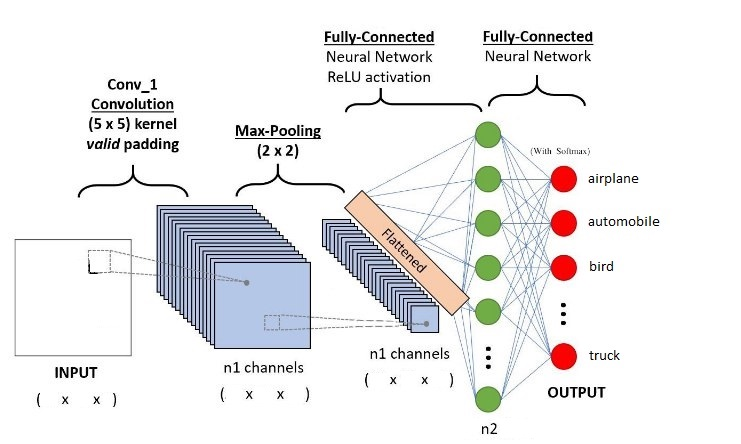

#### **Questions**

- What are the input dimensions?
- What are the dimensions of the feature maps?
- What are the dimensions after pooling?
- What is the size of each input (i.e value of `in_features`) to the first fully connected linear layer?
- What is the number of parameters for conv_1?

**Your answers here**
* input dim = (32,32,3)
* (28,28)
* (14,14)
* 14 * 14 * 32 = 6272
* 25 weights and one bias for every feature. -> 25 * 32 = 800

In [8]:
cifar = torchvision.datasets.CIFAR10(data_dir, train=True, download=True)

Files already downloaded and verified


In [9]:
cifar[0][0].size

(32, 32)

In [10]:
# TODO define model
class CNN(nn.Module):
    """CNN torch model."""
    def __init__(self, input_dim, n1, n2, output_dim, act_fn=None):
        """Initialize model.

        Args:
            act_fn (nn activation function, optional): Activation function
                to use after the first and all the hidden layers. If None, use
                nn.ReLU(). Defaults to None.
        """
        super().__init__()
        
        if act_fn == None:
            act_fn = nn.ReLU()

        # kernel
        self.conv1 = nn.Conv2d(input_dim, n1, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(14*14*n1, n2)  
        self.fc2 = nn.Linear(n2, output_dim)
            
        #soft max
        self.softmax = nn.Softmax(dim=0)
        
    def forward(self, x):
        """Compute model predictions.

        Args:
            x (torch.Tensor, shape (batchsize, num_channels, x, y)): Tensor of
                batch of input images

        Returns:
            torch.Tensor, shape (batchsize, num_classes): Tensor of model
                predictions
        """
        out = []
        
        #convolution
        for e in x:
            a = self.conv1(e)
            #pooling and falattening
            a = torch.flatten(F.max_pool2d(a, 2))
            # fully connected layers
            a = F.relu(self.fc1(a))
            a = self.fc2(a)
            
            out.append(self.softmax(a))
        
        out = torch.stack((out))
            
        return out

In [11]:
cnn = CNN(3, 32, 512, 10)

#### **TODO**

- Train the model for 10 epochs. Try lr=0.001 (can be changed to suit other design choices you make)
- Plot the results of accuracy and loss as you did in exercise sheet 1.

Finished training after 381 seconds.


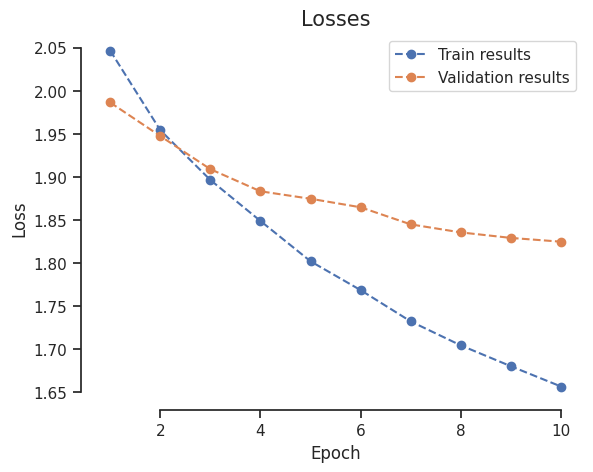

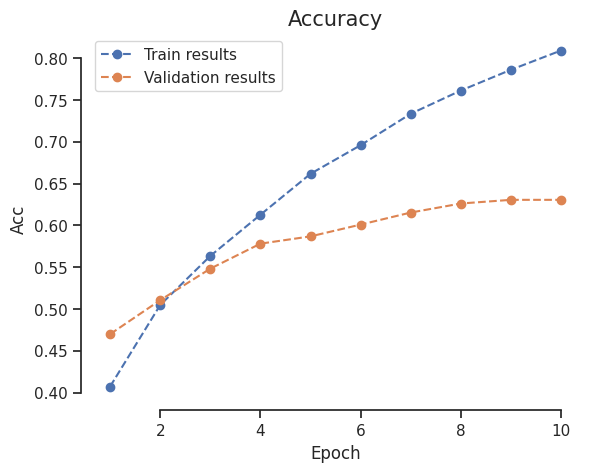

0.6305


In [12]:
# TODO train and plot
model = cnn
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
iterations = 10

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, iterations, trainloader, valloader)
plot("Losses", "Loss", train_losses, val_losses, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
plot("Accuracy", "Acc", train_accs, val_accs, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
print(max(val_accs))

#### **TODO**
Compare results to the MLP models you trained in Exercise 1. What can you observe?

**Your answers here**
The results on the validation set are already much better after 3 epochs than the convergence point of the MLP!

**For your reference, below is the loss and accuracy plots of an MLP model trained in Exercise sheet 1:**

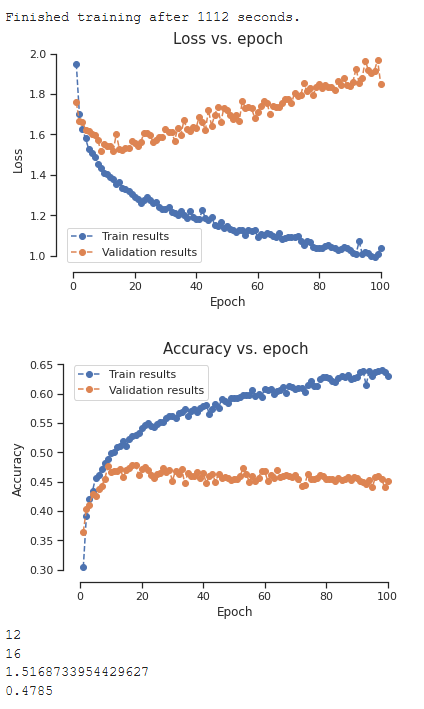

#### **TODO** 
Train longer (ca. 60 epochs), plot again.

In [13]:
cnn = CNN(3, 32, 512, 10)

Finished training after 2266 seconds.


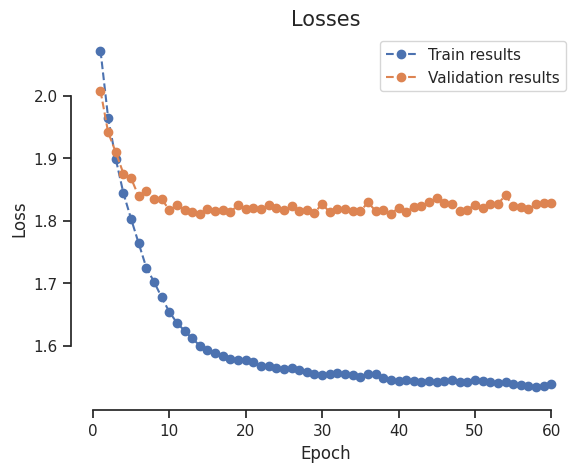

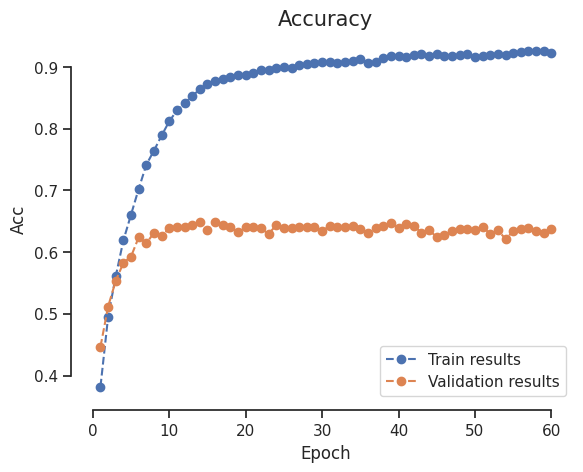

0.6481


In [14]:
# TODO train and plot
model = cnn
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
iterations = 60

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, iterations, trainloader, valloader)
plot("Losses", "Loss", train_losses, val_losses, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
plot("Accuracy", "Acc", train_accs, val_accs, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
print(max(val_accs))

#### **Questions**
- Why is that not an optimal model?
- What could be improved?

**Your answers here**

The model tends to overfit after few epochs already. The number of weights is relatively small. This number can be increased to capture the input better and to improve loss and accuracy.
The number can be improved by more conv layers and more feature maps for example.

## 4. CNN model with more convolutional layers

#### **TODO**
Define the architecture using the following information:



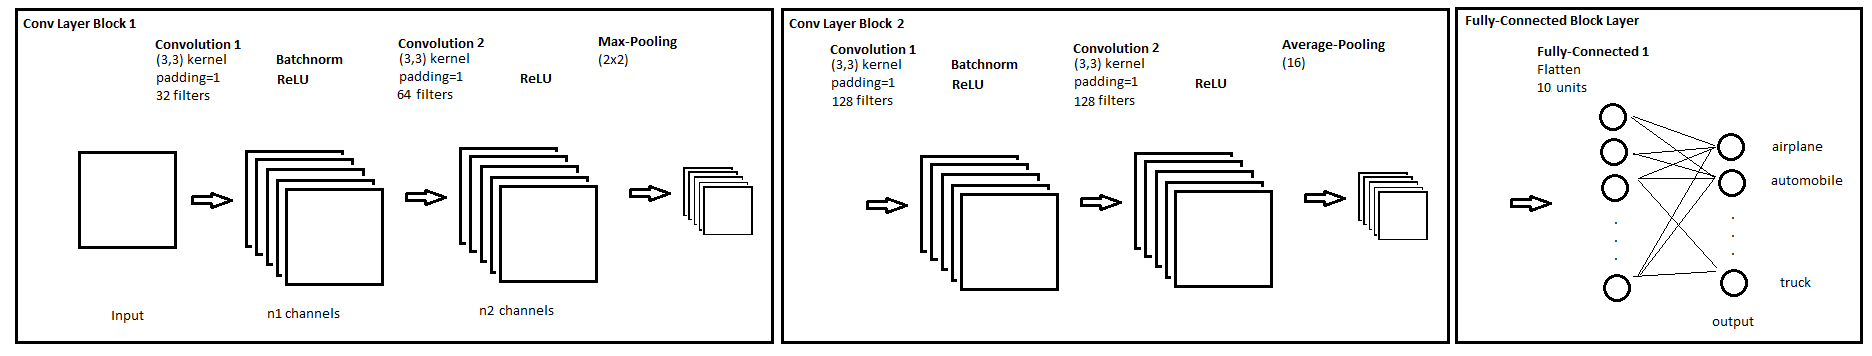

*   Convolutional layer 1: with 32 filters, kernel size of 3*3 and padding 1.
*   Batchnorm and ReLU layers
*   Convolutional layer 2: with 64 filters, kernel size of 3*3 and padding 1.
*   ReLU Activation layer
*   Max pooling with kernel size of 2*2
*   Convolutional layer 3: with 128 filters, kernel size of 3*3 and padding 1.
*   Batchnorm and ReLU layers
*   Convolutional layer 4: with 128 filters, kernel size of 3*3 and padding 1.
*   ReLU Activation layer
*   Average pooling with kernel size 16*16
*   Fully connected layer

#### **Questions**

- Padding is used in the convolutional layers. What does that mean, which variants exist and how does it influence the dimensions of the feature maps?
- What does padding=1 mean in the case of the network displayed above?
- What are the dimensions of the feature maps after the 1. conv layer?
- What are the dimensions of the feature maps after the 2. conv layer?
- What ist the receptive field size after the first two convolutions?
- What is the value for the in_features for the fully-connected layer?
- What is the number of parameters of *Conv Layer block 1*?

**Your answers here**
* There is zero and valid padding. Zero padding ensures that the size of the feature maps is held constant
* In this case this corresponds zero padding
* (32,32)
* (32,32)
* (5,5)
* 128 in_features
* 32 * 3 * 3 + 64 * 3 * 3 = 864

In [15]:
#TODO define model 2
class CNN2(nn.Module):
    """CNN torch model."""
    def __init__(self, act_fn=None):
        """Initialize model.
        """
        super().__init__()
        
        if act_fn == None:
            act_fn = nn.ReLU()

        # kernel
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1,)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
    
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(128, 10)
        
        #batch norm
        self.norm1 = nn.BatchNorm1d(32)
        self.norm2 = nn.BatchNorm1d(16)
        
        # poolings
        self.pool1 = nn.MaxPool2d(2)
        self.pool2 = nn.AvgPool2d(16) 
              
        
    def forward(self, x):
        """Compute model predictions.

        Args:
            x (torch.Tensor, shape (batchsize, num_channels, x, y)): Tensor of
                batch of input images

        Returns:
            torch.Tensor, shape (batchsize, num_classes): Tensor of model
                predictions
        """
        out = []
        
        #convolution
        for e in x:
            a = self.conv1(e)
            a = self.norm1(a)
            a = F.relu(a)
            a = F.relu(self.conv2(a))
            a = self.pool1(a)
            a = self.conv3(a)
            a = self.norm2(a)
            a = F.relu(a)
            a = F.relu(self.conv4(a))
            a = self.pool2(a)
            a = a.T
            
            # fully connected layers
            a = self.fc1(a)
            
            out.append(a)
    
        
        out = torch.stack((out)).squeeze()
            
        
        return out

#### **TODO** 

- train the new net (30 epochs, try lr=0.1 or change as necessary), plot the results, and compare the results to the 1-layer CNN
- explain why you observe these results

/tmp/ipykernel_26/299259104.py:55: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3571.)
  a = a.T


Finished training after 772 seconds.


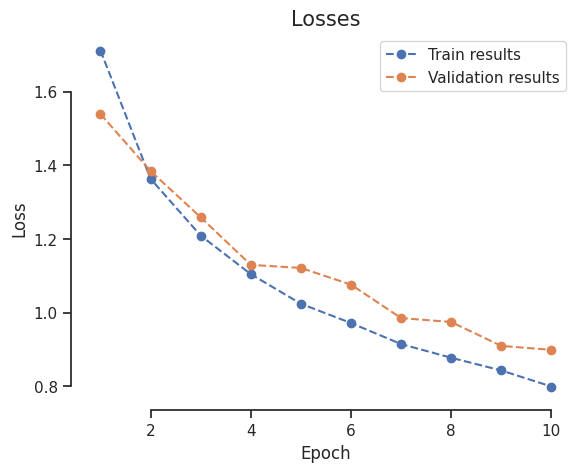

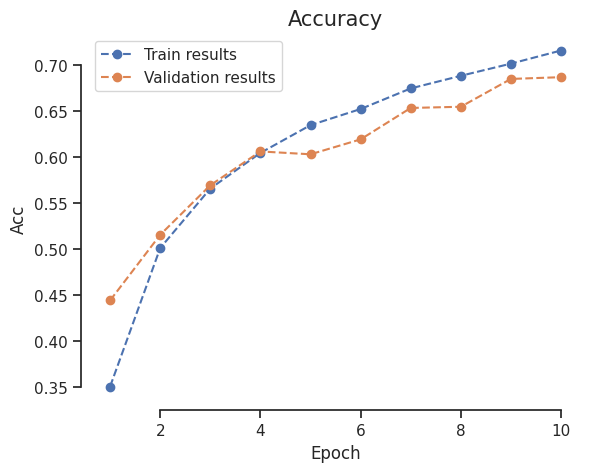

0.6868


In [16]:
# TODO train and plot
model = CNN2()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
iterations = 10

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, iterations, trainloader, valloader)
plot("Losses", "Loss", train_losses, val_losses, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
plot("Accuracy", "Acc", train_accs, val_accs, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
print(max(val_accs))

Finished training after 773 seconds.


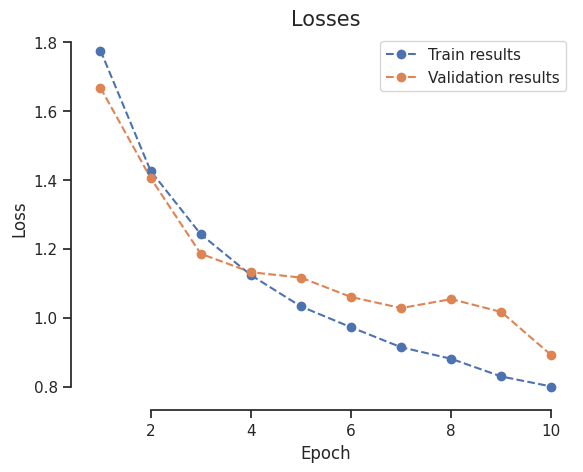

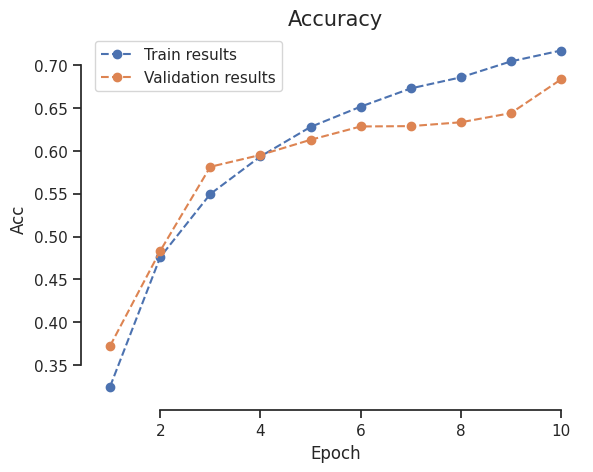

0.6836


In [17]:
# TODO train and plot
model = CNN2()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
iterations = 10

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, iterations, trainloader, valloader)
plot("Losses", "Loss", train_losses, val_losses, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
plot("Accuracy", "Acc", train_accs, val_accs, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
print(max(val_accs))

## 5. ResNet architecture

"*Deeper neural networks are more difficult to train.  We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously.*" [ https://arxiv.org/pdf/1512.03385.pdf]

That was the intention of He et al. to develop residual networks.

A ResNet is built of blocks which are called the *Residual Blocks*. 
A residual block uses *skip connections* - shortCuts — to jump over some layers to skip some activations.
The Resnet skips connections via addition.

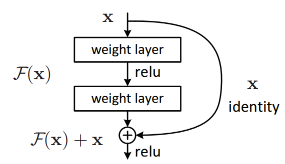

#### **Questions**
- Which problems do using skip connections solve?
- Why is a residual network called residual? 

**Your answers here**
* for non-vanishing gradients in deep networks and for better peformance through combination of identity and feature maps
* after a residual block the difference between the original and the F(x) is compared -> residual

#### **TODO**
- write a class **ResidualBlock(nn.Module)** where you define the blocks used in the ResNet
- write a class **ResNet(nn.Module)** where you define the model
- Train the model and plot results
- Train another model by disable residual connections and compare performance

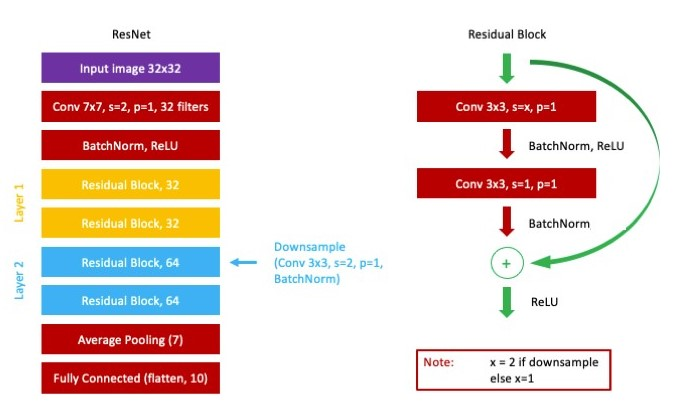

**Hints**

- The downsampling in this ResNet happens between layer 1 and layer 2. In this step, the channel size is increased (32 -> 64) and the image resolution is downsampled by strided convolution (stride=2 in the Conv2d layers).
- For the adding part, the dimensions obviously have to be the same. This is accomplished by using stride=2 in the first Conv2d layer of the block while the second layer does not change the dimensions.
- The average-pooling layer has kernel size 7.
- For you to ensure everything works fine, here are the shapes in the form [(batchsize), x, y, channel] where I discard batchsize, because it does not change.
32x32x3 -> conv 7x7 -> 14x14x32 -> layer 1 -> 14x14x32 -> layer2 -> 7x7x64 -> avpool(7) -> 1x1x64 -> linear(64, 10)

In [18]:
# TODO write a class ResidualBlock(nn.Module) where you define the blocks used in the ResNet

class ResidualBlock(nn.Module):
    def __init__(self, input_dim, x, norm_width, skip_connections=True):
        super().__init__()
        self.input_dim = input_dim
        self.x = x
        self.norm_width = norm_width
        self.skip_connections = skip_connections
        
        #define convolutional layers
        self.conv1 = nn.Conv2d(self.input_dim, self.input_dim, 3, stride=x, padding=1)
        self.conv2 = nn.Conv2d(self.input_dim, self.input_dim, 3, stride=1, padding=1)
        
        #define norms
        self.norm1 = nn.BatchNorm1d(self.norm_width)
        
        #define pool layer
        self.pool = nn.AvgPool1d(x)
        
        
    def forward(self, x):
        pooled_x = x
        
        a = F.relu(self.norm1(self.conv1(x)))
        a = self.norm1(self.conv1(a))

        if self.skip_connections:
            if self.x != 1:
                pooled_x = self.pool(self.x)
            a += pooled_x
        a = F.relu(a)
            
        return a
        
        

In [19]:
# TODO write a class ResNet(nn.Module) where you define the model

class ResNet(nn.Module):
    def __init__(self, skip_connections=True):
        super().__init__()
        self.skip_connections = skip_connections
        
        #conv layers:
        self.conv1 = nn.Conv2d(3, 32, 7, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        
        
        #resblocks
        self.res_block1 = ResidualBlock(32, 1, 14, skip_connections=self.skip_connections)
        self.res_block2 = ResidualBlock(32, 1, 14, skip_connections=self.skip_connections)
        self.res_block3 = ResidualBlock(64, 1, 7, skip_connections=self.skip_connections)
        self.res_block4 = ResidualBlock(64, 1, 7, skip_connections=self.skip_connections)
        
        #pooling
        self.pool1 = nn.AvgPool2d(7)
        
        #norm
        self.norm1 = nn.BatchNorm1d(14)
        self.norm2 = nn.BatchNorm1d(7)
        
        #fc layer
        self.fc = nn.Linear(64,10)
        
    def forward(self, x):
        out = []
    
        #convolution
        for e in x:
            a = F.relu(self.norm1(self.conv1(e)))
            a = self.res_block1(a)
            a = self.res_block2(a)
            a = self.norm2(self.conv2(a))
            a = self.res_block3(a)
            a = self.pool1(self.res_block4(a))
            a = self.fc(a.flatten())
            
            out.append(a)
    
        
        out = torch.stack((out)).squeeze()
        
            
        return out
        
        

Finished training after 5874 seconds.


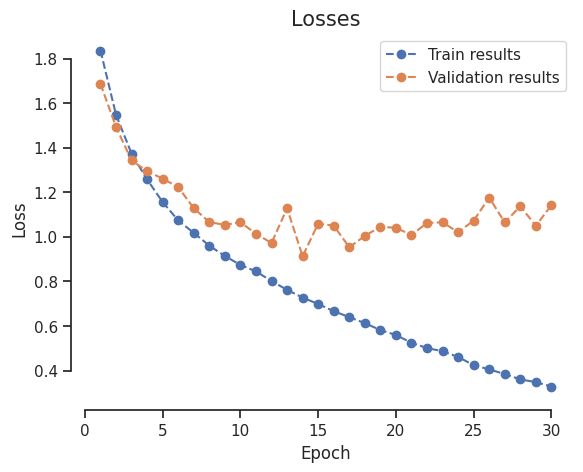

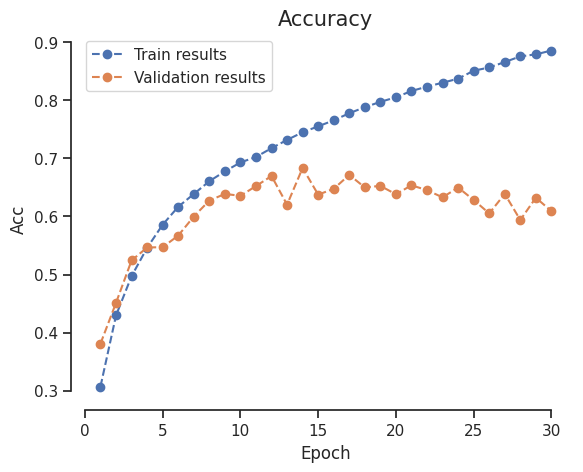

0.6836


In [20]:
# TODO train ResNet using the architecture laid out in the comments and figures above. Plot loss and accuracy for training and validation set.
model = ResNet()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
iterations = 30

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, iterations, trainloader, valloader)
plot("Losses", "Loss", train_losses, val_losses, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
plot("Accuracy", "Acc", train_accs, val_accs, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
print(max(val_accs))

Finished training after 5744 seconds.


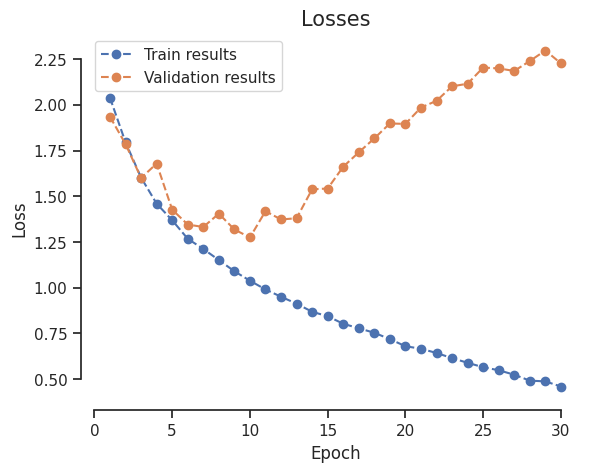

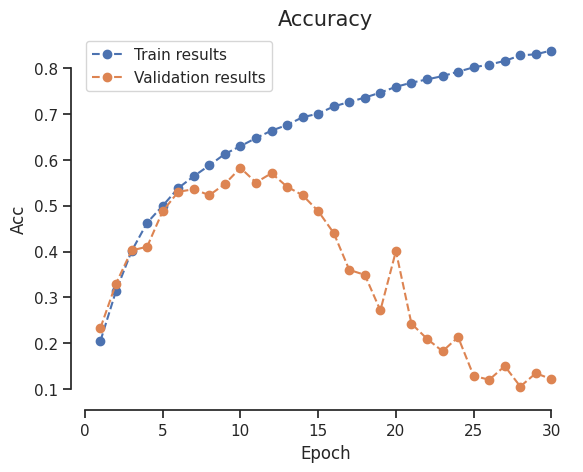

0.5827


In [21]:
# TODO Train another model by disabling all residual connections. Plot loss and accuracy curves for training and validation set.
model = ResNet(False)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
iterations = 30

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training(model, optimizer, loss_function, device, iterations, trainloader, valloader)
plot("Losses", "Loss", train_losses, val_losses, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
plot("Accuracy", "Acc", train_accs, val_accs, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
print(max(val_accs))

**Questions from us**

* difference between BatchNorm1d and BatchNorm2d
* interpolate vs AvgPool
* change in the dimension of the filter (3x3 vs 1x1)

#### **Questions**
- Does using residual connections result in better performance in this exercise? If yes, why? If not, when would the benefit of using ResNet be most visible?
- In deeper networks, how would you expect residual blocks to influence training time? why?
- Compare the performance and training time of your ResNet with the CNNs you trained in the previous section.

**Your answers here**
*
*
* the training takes much longer, at the beginning it's worse than the previous CNN

## 6. Explore Learning Rate Scheduling

Learning rate scheduling is a mechanism to adjust the learning rate.

*`torch.optim.lr_scheduler`* provides several methods based on the number of epochs. Learning rate scheduling should be applied after optimizer’s update.

#### **TODO**
- change run_training and extend to use scheduler for learning rate
- use StepLR (https://pytorch.org/docs/stable/optim.html), use the ResNet, train for 10 epochs. Start with a learning rate of 0.1.


#### **Questions**

- Try step size 1, gamma 0.1
    - How does it change the learning rate?
    - what do you observe regarding performance?
- Try step size 1, gamma 0.9, what do you observe?
    - How does it change the learning rate?
    - what do you observe regarding performance?
- What can you conclude of this experiment regarding the synergy of step size and gamma to get a good schedule?

**Your answers here**

In [22]:
# TODO change run_training (you can copy the code from setup.py here and create a new method here 
# or just change/create a new method it in the python file)
def run_training_schedule(model, optimizer, loss_function, device, num_epochs, 
                train_dataloader, val_dataloader, step_size, gamma, early_stopper=None, verbose=False, patience=1):
    """Run model training.

    Args:
        model (nn.Module): Torch model to train
        optimizer: Torch optimizer object
        loss_fn: Torch loss function for training
        device (torch.device): Torch device to use for training
        num_epochs (int): Max. number of epochs to train
        train_dataloader (DataLoader): Torch DataLoader object to load the
            training data
        val_dataloader (DataLoader): Torch DataLoader object to load the
            validation data
        early_stopper (EarlyStopper, optional): If passed, model will be trained
            with early stopping. Defaults to None.
        verbose (bool, optional): Print information about model training. 
            Defaults to False.

    Returns:
        list, list, list, list, torch.Tensor shape (10,10): Return list of train
            losses, validation losses, train accuracies, validation accuracies
            per epoch and the confusion matrix evaluated in the last epoch.
    """
    stopper = EarlyStopper(patience=patience)
    start_time = time.time()
    master_bar = fastprogress.master_bar(range(num_epochs))
    train_losses, val_losses, train_accs, val_accs = [],[],[],[]
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    

    for epoch in master_bar:
        # Train the model
        epoch_train_loss, epoch_train_acc = train(train_dataloader, optimizer, model, 
                                                  loss_function, device, master_bar)
        # Validate the model
        epoch_val_loss, epoch_val_acc, confusion_matrix = validate(val_dataloader, 
                                                                   model, loss_function, 
                                                                   device, master_bar)

        #update scheduler
        scheduler.step()
        
        # Save loss and acc for plotting
        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        train_accs.append(epoch_train_acc)
        val_accs.append(epoch_val_acc)
        
        
        if verbose:
            master_bar.write(f'Train loss: {epoch_train_loss:.2f}, val loss: {epoch_val_loss:.2f}, train acc: {epoch_train_acc:.3f}, val acc {epoch_val_acc:.3f}')
            
        if early_stopper:
            if stopper.stopper(epoch_val_acc,model):
                return train_losses, val_losses, train_accs, val_accs, confusion_matrix
            # END OF YOUR CODE #
            
    time_elapsed = np.round(time.time() - start_time, 0).astype(int)
    print(f'Finished training after {time_elapsed} seconds.')
    return train_losses, val_losses, train_accs, val_accs, confusion_matrix


Finished training after 1976 seconds.


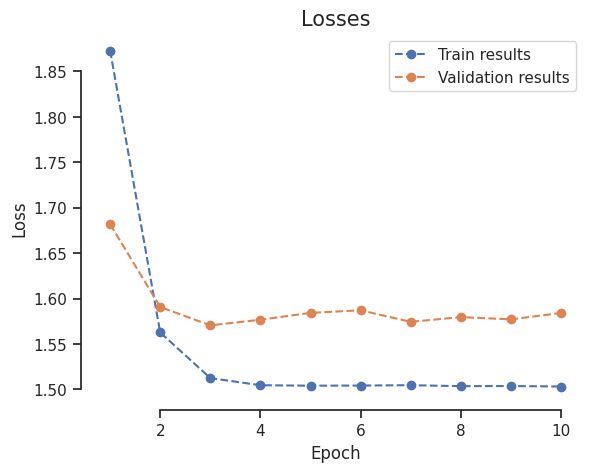

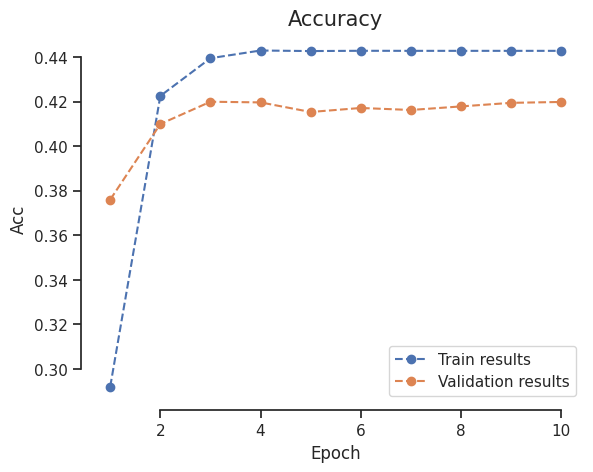

0.4199


In [23]:
# TODO train and plot with step size 1, gamma 0.1

model = ResNet()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
iterations = 10
step_size = 1
gamma = 0.1

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training_schedule(model, optimizer, loss_function, device, iterations, trainloader, valloader, step_size, gamma)
plot("Losses", "Loss", train_losses, val_losses, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
plot("Accuracy", "Acc", train_accs, val_accs, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
print(max(val_accs))

Finished training after 1964 seconds.


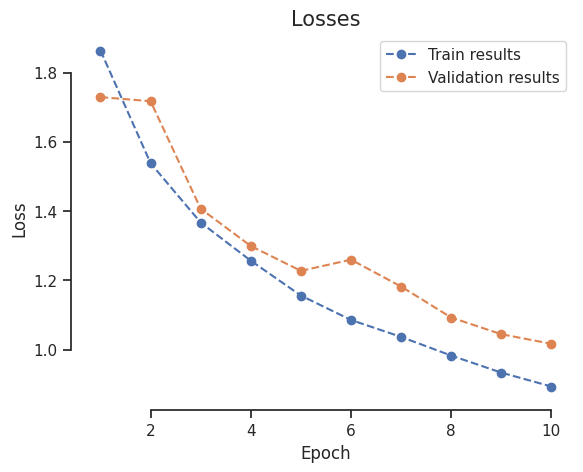

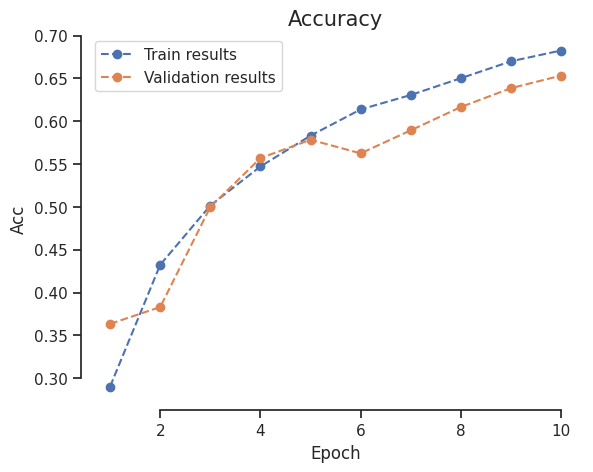

0.6533


In [24]:
# TODO train and plot with step size 1, gamma 0.9

model = ResNet()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
iterations = 10
step_size = 1
gamma = 0.9

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training_schedule(model, optimizer, loss_function, device, iterations, trainloader, valloader, step_size, gamma)
plot("Losses", "Loss", train_losses, val_losses, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
plot("Accuracy", "Acc", train_accs, val_accs, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
print(max(val_accs))

#### **TODO** 

Use step size 15, gamma 0.1. Train for 30 epochs.

#### **Questions**
- Does it improve performance?
- What can you observe in the plots?

**Your answers here**

Finished training after 5844 seconds.


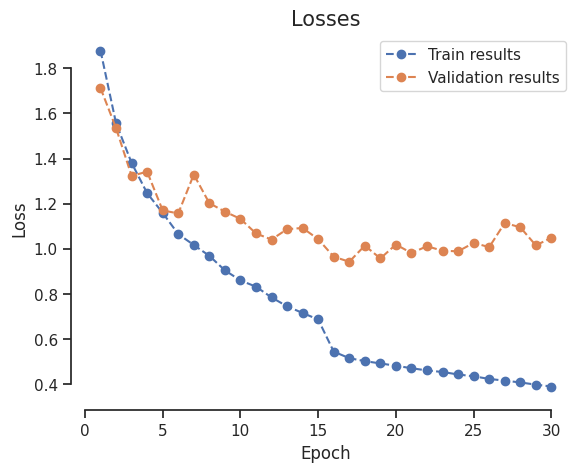

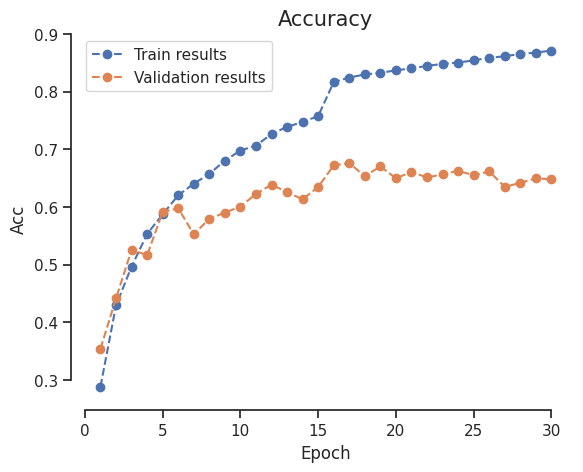

0.6765
Finished!


In [25]:
# TODO train and plot with step size 15, gamma 0.1, 30 epochs.

model = ResNet()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
iterations = 30
step_size = 15
gamma = 0.1

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training_schedule(model, optimizer, loss_function, device, iterations, trainloader, valloader, step_size, gamma)
plot("Losses", "Loss", train_losses, val_losses, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
plot("Accuracy", "Acc", train_accs, val_accs, yscale='linear', save_path=None, extra_pt=None, extra_pt_label=None)
print(max(val_accs))
print('Finished!')

## [7. Optional LR-Scheduling]

#### **TODO**
- try two more scheduler: ExponentialLR and ReduceLROnPlateau 
- vary the parameters, which work best?
- does it improve performance compared to no scheduler?
- does it improve performance compared to StepLR?

In [26]:
# TODO train and plot with different schedulers

**Your answers here**